# Explore here

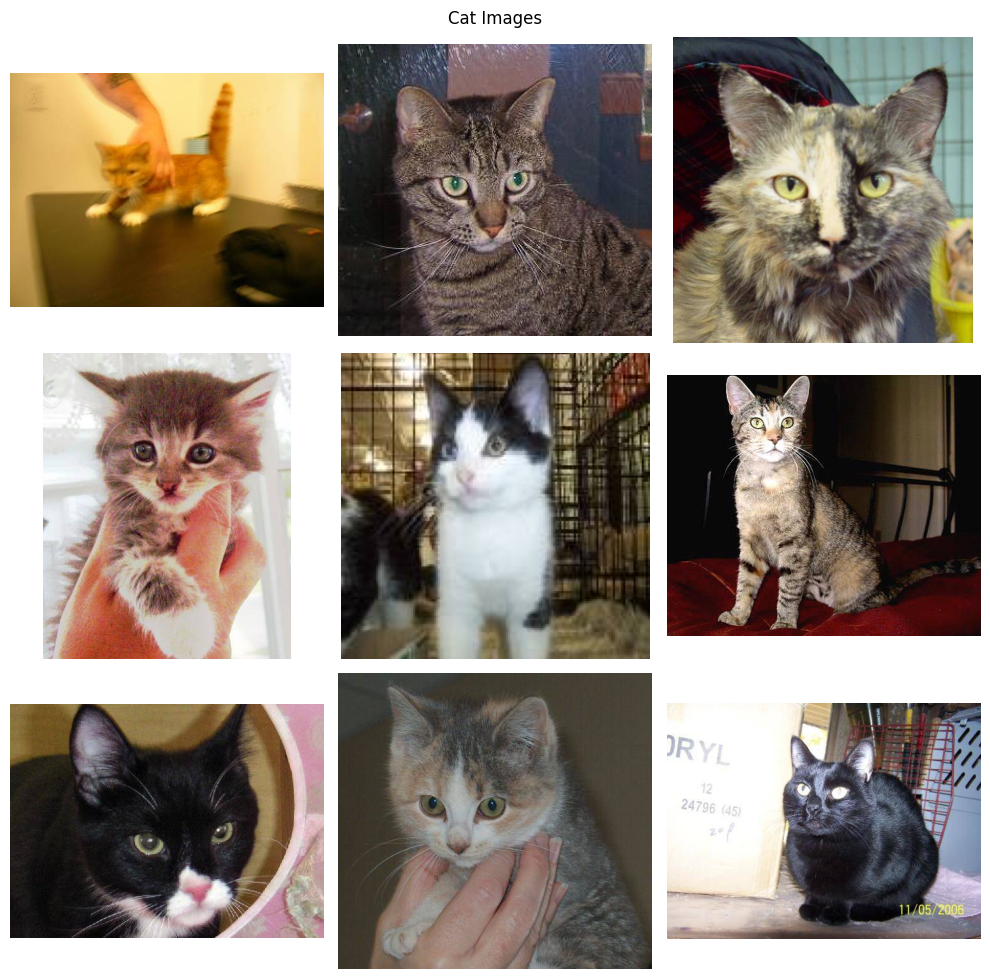

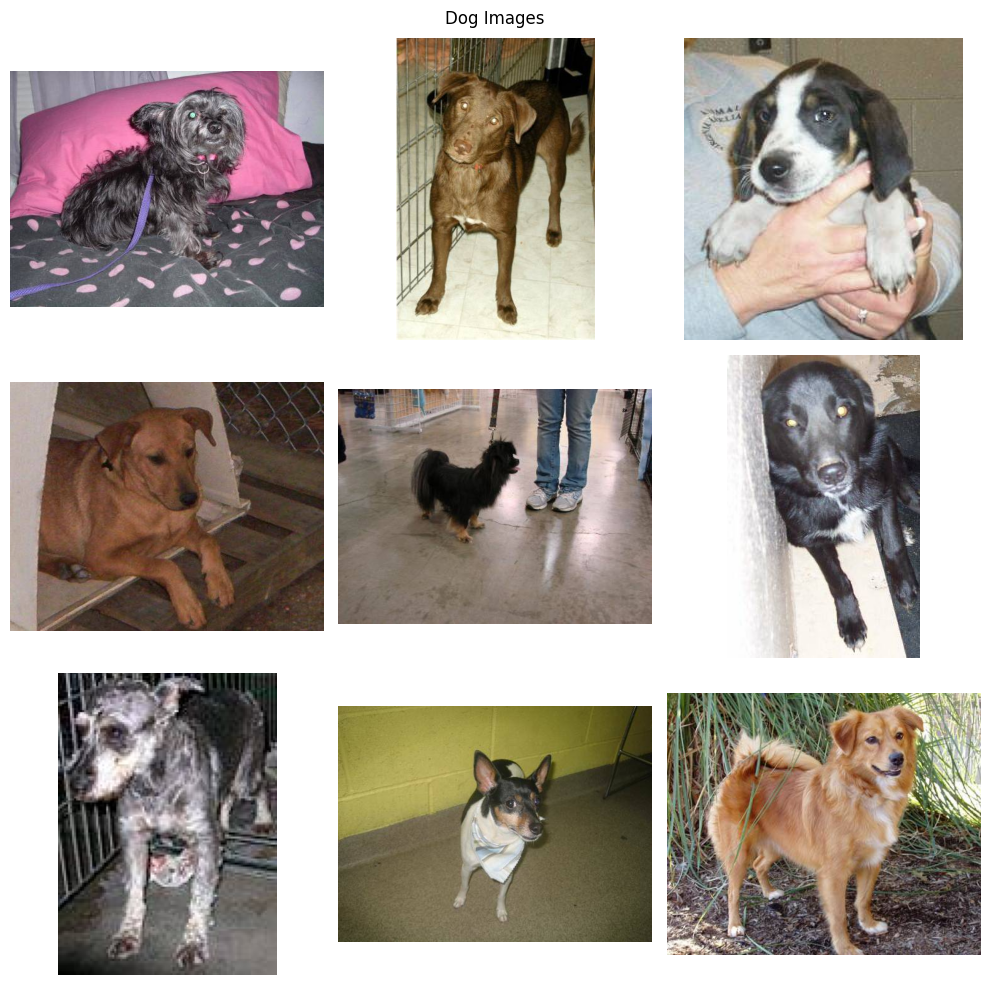

In [ ]:
# Your code here
import matplotlib.pyplot as plt
import os
from PIL import Image
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.models import load_model
from keras.preprocessing import image
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt

train_dir = "../data/raw/train"
test_dir = "../data/raw/test1"


def show_images_by_label(image_dir, label, title):


    os.path.join(image_dir)
    
    images = [img_name for img_name in sorted(os.listdir(image_dir)) if label in img_name][:9]
    if not images:
        print(f"No images found in {image_dir}")
        return

    plt.figure(figsize=(10, 10))
    for i, img_name in enumerate(images):
        img_path = os.path.join(image_dir, img_name)
        try:
            img = Image.open(img_path)
            plt.subplot(3, 3, i + 1)
            plt.imshow(img)
            plt.axis('off')
        except Exception as e:
            print(f"Error opening image {img_name}: {e}")
            continue
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()


show_images_by_label(image_dir=train_dir, label="cat", title="Cat Images")
show_images_by_label(image_dir=train_dir, label="dog", title="Dog Images")


In [43]:
filenames = os.listdir(train_dir)
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [44]:
df.head()

,filename,category
0,cat.0.jpg,0
1,cat.1.jpg,0
2,cat.10.jpg,0
3,cat.100.jpg,0
4,cat.1000.jpg,0


In [45]:
df.tail()

,filename,category
24995,dog.9995.jpg,1
24996,dog.9996.jpg,1
24997,dog.9997.jpg,1
24998,dog.9998.jpg,1
24999,dog.9999.jpg,1


<Axes: xlabel='category'>

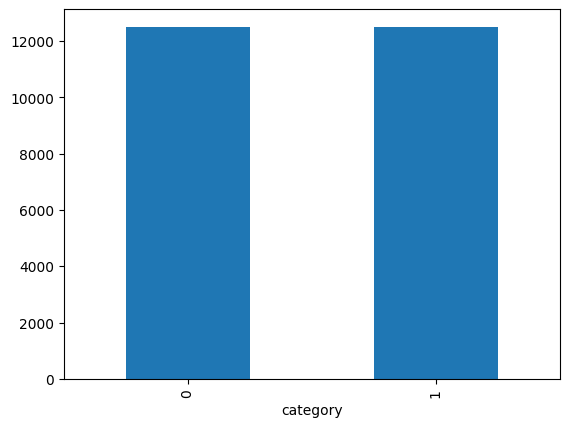

In [46]:
df['category'].value_counts().plot.bar()

In [47]:
df["category"] = df["category"].replace({0: 'cat', 1: 'dog'})

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

In [48]:
print(train_df['category'].value_counts())
print(test_df['category'].value_counts())

category
dog    10015
cat     9985
Name: count, dtype: int64
category
cat    2515
dog    2485
Name: count, dtype: int64


<Axes: xlabel='category'>

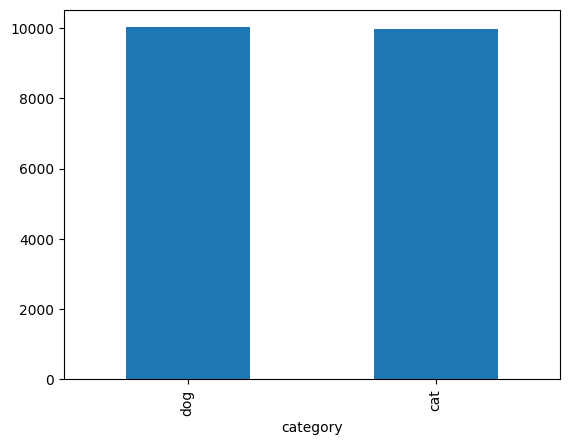

In [49]:
train_df['category'].value_counts().plot.bar()

<Axes: xlabel='category'>

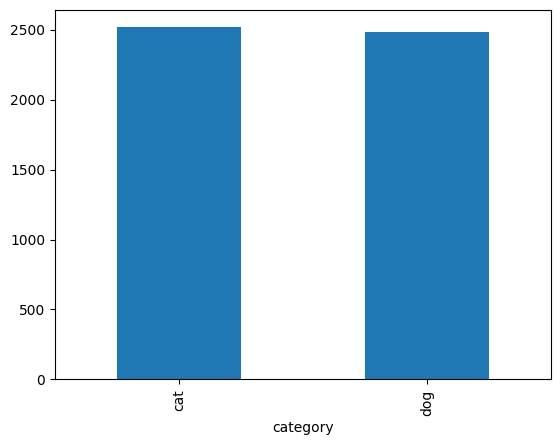

In [50]:
test_df['category'].value_counts().plot.bar()

In [ ]:
TARGET_SIZE = (200, 200)
BATCH_SIZE = 15

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


train_data = train_datagen.flow_from_dataframe(
    train_df, 
    train_dir, 
    x_col='filename',
    y_col='category',
    target_size=TARGET_SIZE,
    class_mode='categorical',
    batch_size=BATCH_SIZE
)

validation_datagen = ImageDataGenerator(rescale=1./255)
test_data = validation_datagen.flow_from_dataframe(
    test_df, 
    train_dir, 
    x_col='filename',
    y_col='category',
    target_size=TARGET_SIZE,
    class_mode='categorical',
    batch_size=BATCH_SIZE
)

Found 20000 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


In [52]:
total_train = train_df.shape[0]
total_validate = test_df.shape[0]

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

model.save("../models/basic_model.keras")


C:\Users\Ganyu-chan\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 198, 198, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 198, 198, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 99, 99, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 99, 99, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 97, 97, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 97, 97, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 46, 46, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 46, 46, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 67712)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │    34,669,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,766,274 (132.62 MB)

 Trainable params: 34,764,802 (132.62 MB)

 Non-trainable params: 1,472 (5.75 KB)

In [ ]:
checkpoint = ModelCheckpoint(
    "C:/Users/Ganyu-chan/Desktop/Hehe/models/best_model.keras",
    monitor="val_accuracy",
    save_best_only=True,
    save_weights_only=False,
    mode="auto",             
    verbose=1
)

early_stopping = EarlyStopping(
    monitor="val_accuracy",     
    patience=10,
    mode="auto",           
    restore_best_weights=True,
    verbose=1
)

learning_rate_reduction = ReduceLROnPlateau(
    monitor='val_accuracy', 
    factor=0.5, 
    patience=2, 
    verbose=1, 
    min_lr=1e-6
)

In [55]:
from keras.optimizers import Adam
import keras

model.compile(loss = keras.losses.categorical_crossentropy, optimizer = Adam(learning_rate = 0.001), metrics = ["accuracy"])

history = model.fit(
    train_data, 
    epochs=20,
    validation_data=test_data,
    steps_per_epoch = len(train_data),
    validation_steps = len(test_data),
    callbacks=[checkpoint, early_stopping, learning_rate_reduction]
)

C:\Users\Ganyu-chan\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
1334/1334 ━━━━━━━━━━━━━━━━━━━━ 0s 736ms/step - accuracy: 0.5792 - loss: 0.9615
Epoch 1: val_accuracy improved from -inf to 0.67560, saving model to C:/Users/Ganyu-chan/Desktop/Hehe/models/best_model.keras
1334/1334 ━━━━━━━━━━━━━━━━━━━━ 1009s 754ms/step - accuracy: 0.5792 - loss: 0.9613 - val_accuracy: 0.6756 - val_loss: 0.6075 - learning_rate: 0.0010
Epoch 2/20
1334/1334 ━━━━━━━━━━━━━━━━━━━━ 0s 648ms/step - accuracy: 0.6429 - loss: 0.6469
Epoch 2: val_accuracy did not improve from 0.67560
1334/1334 ━━━━━━━━━━━━━━━━━━━━ 888s 665ms/step - accuracy: 0.6429 - loss: 0.6469 - val_accuracy: 0.6630 - val_loss: 0.6252 - learning_rate: 0.0010
Epoch 3/20
1334/1334 ━━━━━━━━━━━━━━━━━━━━ 0s 648ms/step - accuracy: 0.6526 - loss: 0.6300
Epoch 3: val_accuracy did not improve from 0.67560

Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
1334/1334 ━━━━━━━━━━━━━━━━━━━━ 888s 665ms/step - accuracy: 0.6526 - loss: 0.6299 - val_accuracy: 0.6658 - val_loss: 0.6349 - learn

In [ ]:
best_model = load_model("../models/best_model.keras")

In [57]:
val_loss, val_acc = best_model.evaluate(test_data)
print(f"Validation loss: {val_loss:.2f}")
print(f"Validation accuracy: {val_acc:.2f}")

334/334 ━━━━━━━━━━━━━━━━━━━━ 37s 107ms/step - accuracy: 0.8598 - loss: 0.3318
Validation loss: 0.33
Validation accuracy: 0.86


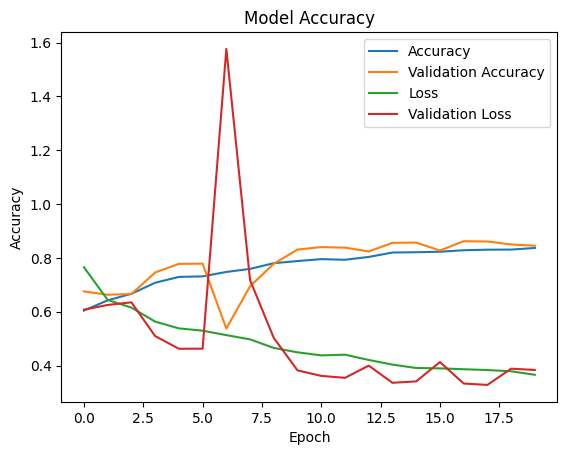

In [58]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy", "Validation Accuracy", "Loss", "Validation Loss"])

plt.show()

dog


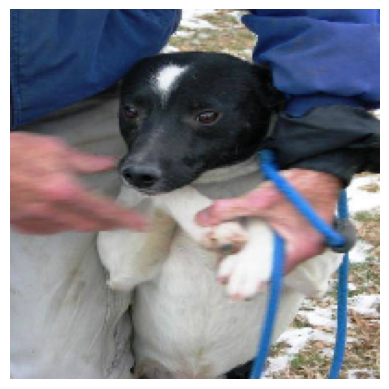

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step
Raw output: [[0.16647898 0.833521  ]]


In [ ]:
""""
predicted_class = np.argmax(output)
if predicted_class == 0:
    print("cat")
elif predicted_class == 1:
    print("dog")
else:
    print("Unknown class")

img = image.load_img("C:/Users/Ganyu-chan/Desktop/Hehe/test1/1.jpg", target_size=(200, 200), color_mode="rgb")
img = np.asarray(img) / 255.0  # <- ¡IMPORTANTE! Normalizar igual que durante entrenamiento
plt.imshow(img)
plt.axis("off")
plt.show()

img = np.expand_dims(img, axis=0)


saved_model = load_model("C:/Users/Ganyu-chan/Desktop/Hehe/models/best_model.keras")

output = saved_model.predict(img)

print("Raw output:", output)
"""